In [3]:
from training_dash_app import classification_utils as utils
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
# from collections import OrderDict

font = {'size': 15}

mpl.rc('font', **font)

%load_ext autoreload
%autoreload 2
print('we workin!')

we workin!


In [5]:
new_class_file = r'/home/disk/p/jkcm/dump/manif.csv'
# df = pd.read_csv(new_class_file)
data = utils.read_and_parse_classifications(new_class_file, annotations_parser=utils.tidy_parser, parse_subject_data=True)

In [32]:
data.workflow_version

174     32.71
175     32.71
176     32.71
177     32.71
178     32.71
        ...  
2485    33.74
2486    33.74
2487    33.74
2488    33.74
2489    33.74
Name: workflow_version, Length: 2316, dtype: float64

In [7]:
    lats = np.array([float(i['subject_data']['lat']) for _,i in data.iterrows()])
    lons = np.array([float(i['subject_data']['lon']) for _,i in data.iterrows()])

KeyError: 'lat'

In [4]:
classified_file = r'/home/disk/eos4/jkcm/Data/MEASURES/zooniverse/classification_datasets/classify_128km-classifications_2019-04-14.csv'
data = utils.read_and_parse_classifications(classified_file, annotations_parser=utils.tidy_parser, parse_subject_data=True)
print('loaded')
data['cf'] = [float(i['low_cf']) for i in data['subject_data'].values]
data['hi_cf'] = [float(i['high_cf']) for i in data['subject_data'].values]
data['date'] = [dt.datetime.strptime(i['date'][:10], '%Y-%m-%d') for i in data.subject_data.values]
grouped = data.groupby('label')

loaded


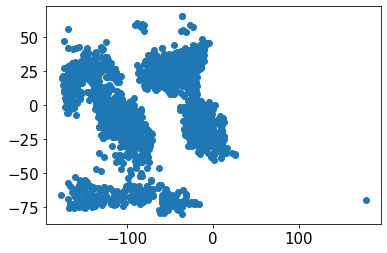

In [41]:
lats = np.array([float(i['subject_data']['lat']) for _,i in data.iterrows()])
lons = np.array([float(i['subject_data']['lon']) for _,i in data.iterrows()])
plt.scatter(lons, lats)

In [8]:
min(data.cf)

0.0501708984375

IndexError: list index out of range

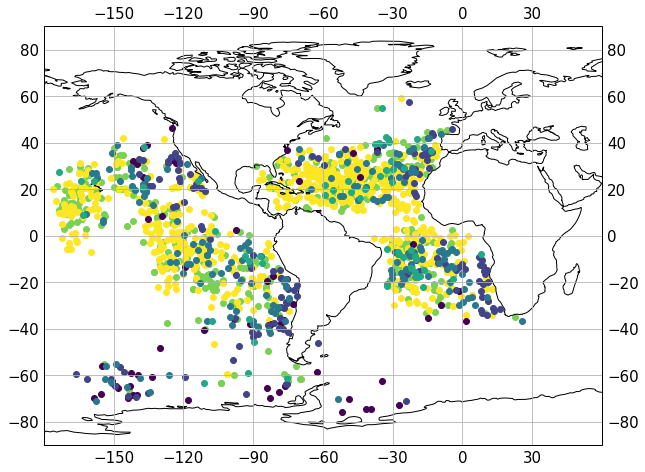

In [26]:
def add_box(ax, lats, lons):
    width = lons[1] - lons[0]
    height = lats[1] - lats[0]
    ax.add_patch(mpatches.Rectangle(xy=[lons[0], lats[0]], width=width, height=height,
                                facecolor='None', edgecolor='Blue', linewidth=2,
                                transform=ccrs.PlateCarree())
             )

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_extent((-180, 60, -90, 90), crs=ccrs.PlateCarree())
# ax.set_global()

# add_box(ax, lats=(-30, -5), lons=(-115, -72))
# add_box(ax, lats=(10, 40), lons=(-160, -120))
# add_box(ax, lats=(10, 25), lons=(-65, -17)) #changed 
# add_box(ax, lats=(25, 50), lons=(-75, -25)) #changed
# add_box(ax, lats=(-60, -40), lons=(-120, -75))
# add_box(ax, lats=(-30, -5), lons=(-20, 10)) #changed
ax.gridlines(draw_labels=True)
ax.coastlines()

# colors = [mpl.cm.get_cmap('viridis')(i) for i in np.linspace(0,1,3)]
colors = [mpl.cm.get_cmap('viridis')(i) for i in np.linspace(0,1,6)]
ordering = ['Stratus', 'Closed-cell MCC', 'Disorg. MCC', 'Open-cell MCC',
             'Clustered Cu', 'Suppressed Cu', 'Other Issue', 'No Dominant Type']
for i, name in enumerate(ordering):
#     if name[:4] == 'bad_':
#         continue
#     if 'mcc' not in name:
#         continue
#     if name not in ['Clustered Cu', 'Disorg. MCC']:
#         continue
    group = grouped.get_group(name)
    lats = np.array([float(i['subject_data']['lat']) for _,i in group.iterrows()])
    lons = np.array([float(i['subject_data']['lon']) for _,i in group.iterrows()])
    zorder = 1 if 'Cu' in name else 2
    ax.scatter(lons, lats, transform = ccrs.PlateCarree(), label=name, color=colors[i], zorder=zorder)
ax.legend(fontsize=15)
plt.tight_layout()
# fig.savefig('/home/disk/p/jkcm/plots/measures/manual_classifications_maps_all.png', bbox_inches='tight')

In [10]:
grouped.groups.keys()

dict_keys(['Stratus', 'Closed-cell MCC', 'Suppressed Cu', 'Clustered Cu', 'Other Issue', 'Disorg. MCC', 'No Dominant Type', 'Open-cell MCC'])

/home/disk/p/jkcm/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


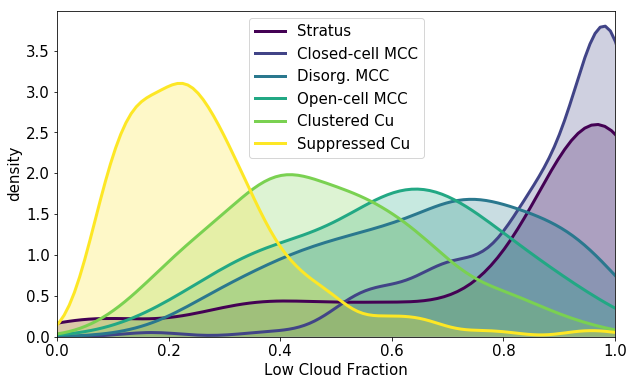

In [23]:
#CF hist
fig, ax = plt.subplots(figsize=(10,6))
colors = [mpl.cm.get_cmap('viridis')(i) for i in np.linspace(0,1,6)]
ordering = ['Stratus', 'Closed-cell MCC', 'Disorg. MCC', 'Open-cell MCC',
             'Clustered Cu', 'Suppressed Cu', 'Other Issue', 'No Dominant Type']
# color_map = {'Stratus':colors[0], 
#              'Closed-cell MCC':colors[1], 
#              'Disorg. MCC': colors[2],
#              'Open-cell MCC': colors[3],
#              'Clustered Cu': colors[4],
#              'Suppressed Cu': colors[5],
#              'Other Issue':'k', 
#              'No Dominant Type':'k'}
for i, name in enumerate(ordering):
    if name[:4] == 'bad_' or name in ['Other Issue', 'No Dominant Type']:
        continue
    group = grouped.get_group(name)
    sns.distplot(group.cf.values, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = name, color=colors[i])
#     grouped.cf.plot.hist(ax=ax, color=colors.pop())
    ax.set_xlim((0,1))
    ax.set_xlabel("Low Cloud Fraction")
    ax.set_ylabel("density")
    fig.savefig('/home/disk/p/jkcm/plots/measures/manual_classifications_pdf.png', bbox_inches='tight')

In [27]:
dt.datetime.strptime(data.iloc[1].subject_data['date'], '%Y-%m-%d %H:%M:%S')

datetime.datetime(2012, 1, 1, 21, 20)

(array([2007.,   99.,   70.,   48.,   25.,   21.,   17.,   13.,    6.,
          10.]),
 array([0.        , 0.01917725, 0.03835449, 0.05753174, 0.07670898,
        0.09588623, 0.11506348, 0.13424072, 0.15341797, 0.17259521,
        0.19177246]),
 <a list of 10 Patch objects>)

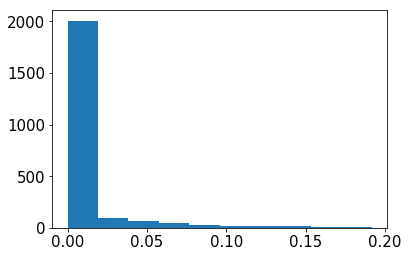

In [30]:
plt.hist(data.hi_cf.values)

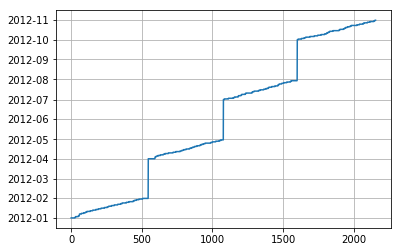

In [38]:
plt.plot(sorted(data.dates))
plt.grid(True)
#Jan 2012, Apr 2012, July 1012, Oct 2012